# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal?

In [16]:
# first compute summary statistics of mean and standard deviation

print ("Mean: \n",df.mean(), "\n\n", "Median: \n", df.median() , "\n\n", "Std: \n", df.std())

Mean: 
 temperature    98.249231
heart_rate     73.761538
dtype: float64 

 Median: 
 temperature    98.3
heart_rate     74.0
dtype: float64 

 Std: 
 temperature    0.733183
heart_rate     7.062077
dtype: float64


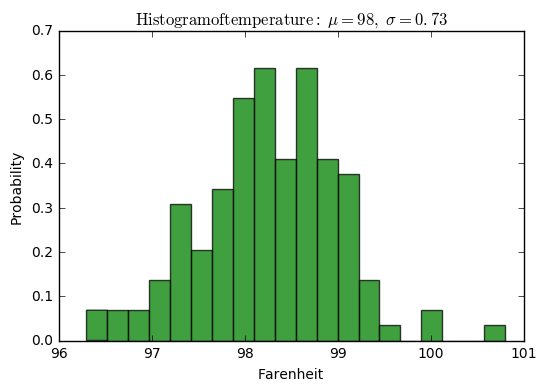

In [14]:
# then plot the histogram of body temperatures
n, bins, patches = plt.hist(df.temperature, 20, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Farenheit')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram of temperature:}\ \mu=98.25,\ \sigma=0.73$')

plt.show()


In [17]:
# looks like we have a roughly normal distribution with potential skewness to the right
#  because the mean is less than the median by only 0.05, which is an ignorable amount out of 98
# the skewness is only:

df.temperature.skew()

-0.0044191311689957711

### 2. Is the sample size large? Are the observations independent?

In [18]:
df.info()
# the sample size is 130, which is large compared to n = 30
# yes, CLT shall apply here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 3. Is the true population mean really 98.6 degrees F?

This is a one sample test because we are considering one population of all people's body temperature.
Null hypothesis Ho: The population mean is 98.6 degrees, and we reject the hypothesis with 0.05 confidence level
The z statistics shall be appropriate here. 
The z statistics at a probability of 0.975 or below is 1.96
Our sample mean is 98.25, so our z hat would be

In [23]:
(98.6 - 98.25 )/ (0.733/np.sqrt(130))

# Our z-score 5.44 is much larger than the z-stat of 1.96, so we reject the null hypothesis

5.4442209929698748

A t-statistics with n-1 degree of freedom (129 here) for a two-tail test at 0.05 confidence level would be 1.98.
And we could still reject our null hypothesis.


### 4. At what temperature should we consider someone's temperature to be "abnormal"?


In [25]:
1.96 * (0.733/np.sqrt(130))
# The 95% confidence interval as computed earlier would be between
# 98.6 - 0.126 and 98.6 + 0.126


0.12600517151780227

In [26]:
98.6 - 0.126
# so a body temperature below 98.474 or above 98.726 would be abnormal

98.47399999999999

### 5. Is there a significant difference between males and females in normal temperature?
Null hypothesis: the difference between male and female body temperature is zero (M - F = 0)

In [29]:
# compute the mean and std of body temperature for male and female

df.groupby(df.gender).mean()

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [30]:
df.groupby(df.gender).std()

,temperature,heart_rate
gender,,
F,0.743488,8.105227
M,0.698756,5.875184


In [31]:
# the mean difference between male and female is :
98.104615 - 98.393846

-0.2892310000000009

In [33]:
# And so the z-stat becomes:
-0.2892 / (0.733/np.sqrt(130))

# this is lower than -1.96 so we reject the null hypothesis 
#that the difference between male and female body temperature was zero

-4.4984820319054668